# Regression in Python

***

In [1]:
# Numerical arrays
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

In [2]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Create two points.
x = np.array([4.0, 16.0])
y = np.array([6.0, 12.0])
x, y

(array([ 4., 16.]), array([ 6., 12.]))

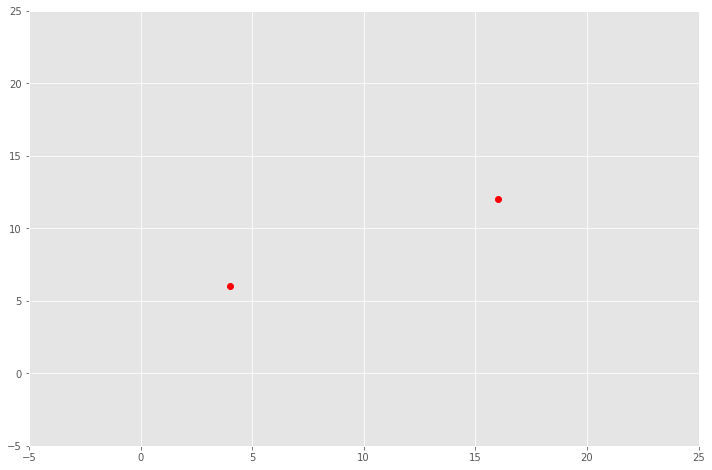

In [4]:
# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

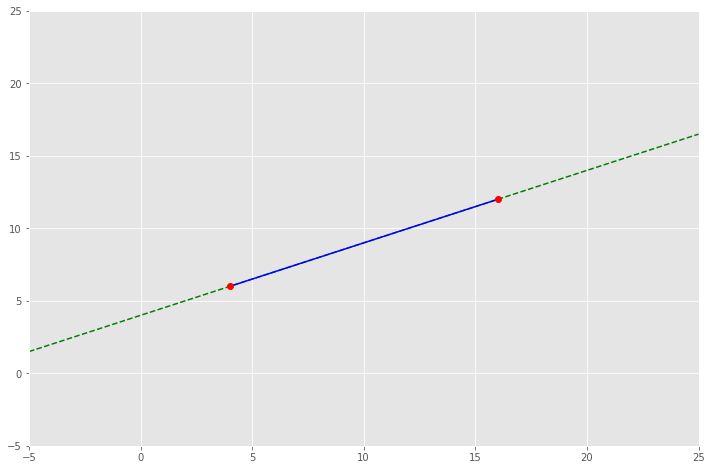

In [5]:
# Plot a straight line.
l = np.linspace(-5.0, 25.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g--')

# Plot a straight line segment.
l = np.linspace(4.0, 16.0, 10)
plt.plot(l, 0.5 * l + 4.0, 'b-')

# Plot the points.
plt.plot(x, y, 'ro')

# Give ourselves some space.
plt.xlim([-5.0, 25.0])
plt.ylim([-5.0, 25.0]);

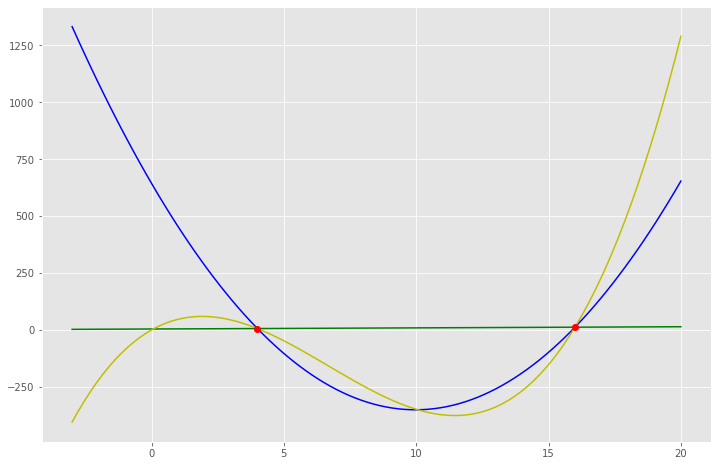

In [6]:
# Plot a straight line.
l = np.linspace(-3.0, 20.0, 100)
plt.plot(l, 0.5 * l + 4.0, 'g-')

# Plot a parabola.
plt.plot(l, 10.0 * (l**2) - 199.5 * l + 644.0, 'b-')

# Plot a cubic.
plt.plot(l, (l**3)  - 20.0625 * l**2  + 65.75 * l, 'y-')

# Plot the points.
plt.plot(x, y, 'ro');

<br>

#### Lines

***

In [7]:
# Set up some x values.
x = np.linspace(0.0, 10.0, 1000)
x[0:11]

array([0.        , 0.01001001, 0.02002002, 0.03003003, 0.04004004,
       0.05005005, 0.06006006, 0.07007007, 0.08008008, 0.09009009,
       0.1001001 ])

***

$$ y = 5 x + 2 $$

In [8]:
# Create y - note numpy's element-wise operations.
y = 5.0 * x + 2.0

In [9]:
# Look at y.
y[0:11]

array([2.        , 2.05005005, 2.1001001 , 2.15015015, 2.2002002 ,
       2.25025025, 2.3003003 , 2.35035035, 2.4004004 , 2.45045045,
       2.5005005 ])

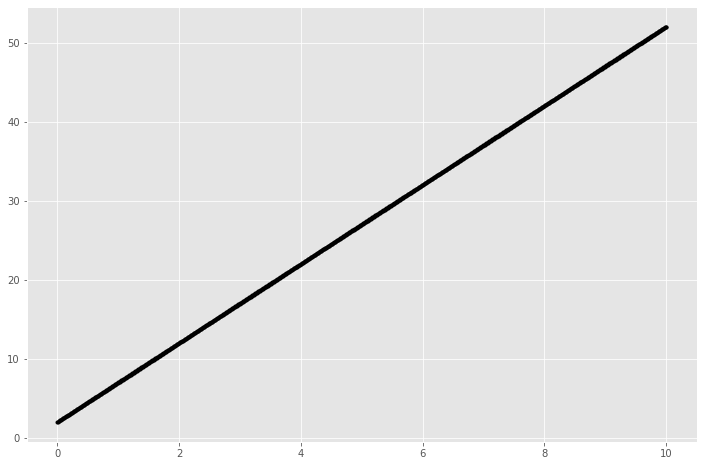

In [10]:
# Plot x versus y.
plt.plot(x, y, 'k.');

In [11]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([5., 2.])

***

$$ y = 3 x - 1 + \epsilon $$

In [12]:
# Create a y with noise.
y = 3.0 * x - 1.0 + np.random.normal(0.0, 1.0, len(x))

In [13]:
# Look at y.
y[60:71]

array([ 0.21819371,  0.86570367,  2.08172706, -0.64258418,  0.62919822,
        0.54646101,  0.6431359 ,  1.20259805,  0.29440026, -0.50692448,
        0.94459499])

In [14]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([ 3.00254344, -1.03899397])

In [15]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(3.0025434365134127, -1.0389939706240807)

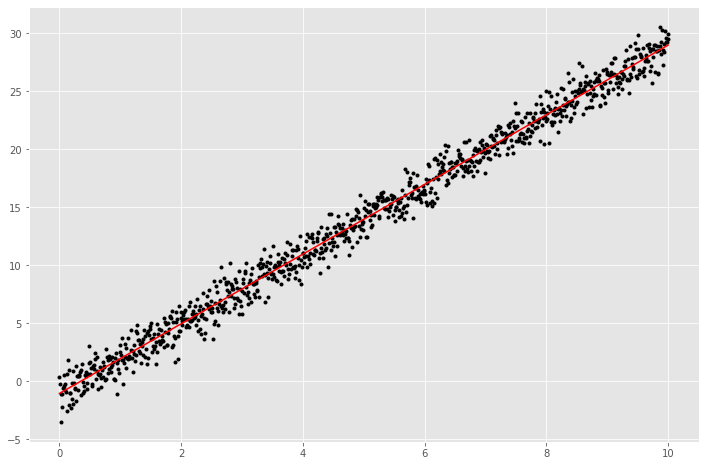

In [16]:
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-');

Note that we can easily calculate the best m and c ourselves.

In [17]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(3.002543436513412, -1.0389939706240785)

***

$$ y = 2 x^2 + 5x + 1 + \epsilon $$

In [18]:
# Create y from a polynomial in x.
y =  2.0 * x * x + 5.0 * x + 1.0 + np.random.normal(0.0, 1.0, len(x))

In [19]:
# Look at y.
y[0:2]

array([-0.06617217,  0.38669847])

In [20]:
# Blindly try the regression - we get answers.
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(25.012104018675743, -32.34743508040102)

In [21]:
np.polyfit(x, y, 2)


array([2.00203231, 4.99178096, 0.98636941])

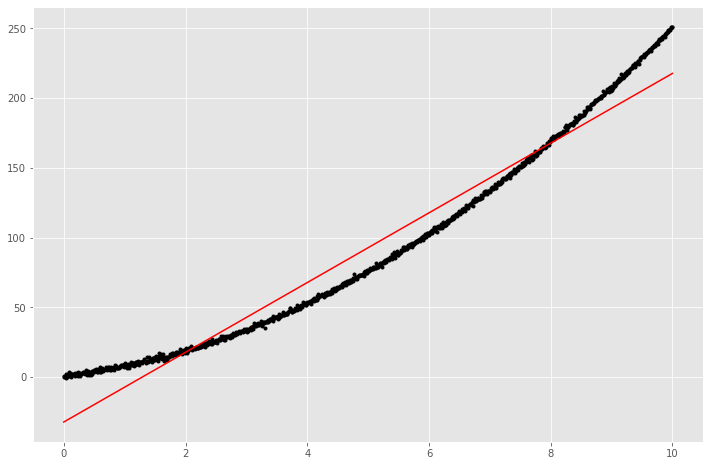

In [22]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')

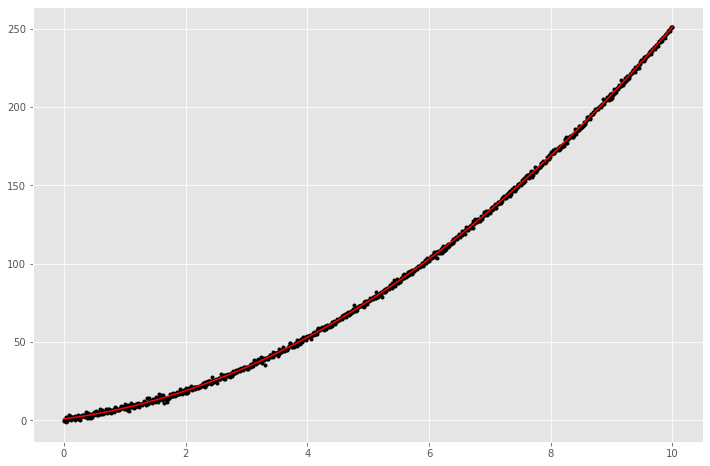

In [23]:
# Create variables with those values.
a, b, c= np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x + c , 'r-');

Note how the points below the line are bunched in a specific $x$ range.

***

## Multiple linear regression

Let's try multiple linear regression using sklearn.
[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

In [24]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [25]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [26]:
# Let's use pandas to read a csv file and organise our data.
import pandas as pd

In [27]:
# Read the iris csv from online.
df = pd.read_csv('https://datahub.io/machine-learning/iris/r/iris.csv')

In [28]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


$$ petalwidth = t (sepallength) + u (sepalwidth) + v (petallength) + c $$

In [29]:
# Let's pretend we want to do linear regression on these variables to predict petal width.
x = df[['sepallength', 'sepalwidth', 'petallength']]

In [30]:
# Here's petal width.
y = df['petalwidth']

In [31]:
# Ask our model to fit the data.
m.fit(x, y)

LinearRegression()

In [32]:
# Here's our intercept.
m.intercept_

-0.248723586024455

In [33]:
# Here's our coefficients, in order.
m.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [34]:
# See how good our fit is.
m.score(x, y)

0.9380481344518986

In [35]:
# Calculating the score by hand.
t, u, v = m.coef_
c = m.intercept_

y_avg = y.mean()

u = ((y - (t * x['sepallength'] + u * x['sepalwidth'] + v * x['petallength'] + c))**2).sum()
v = ((y - y.mean())**2).sum()

1 - (u/v)

0.9380481344518986

***

## Using statsmodels

In [36]:
# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
xwithc = sm.add_constant(x)

# Create a model.
msm = sm.OLS(y, xwithc)
# Fit the data.
rsm = msm.fit()
# Print a summary.
print(rsm.summary())

                            OLS Regression Results                            
Dep. Variable:             petalwidth   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           6.20e-88
Time:                        11:28:29   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2487      0.178     -1.396      

## End